# Projet Climatologie


## Liste des requêtes


- Les températures moyennes françaises de 1995 à 2019.

- L'évolution moyenne de la température chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagrammes sur un seul affichage).

- Le classement graphique des pays les plus chauds au monde.

- Le classement graphique des pays les plus froids au monde.

- L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique.

- L'évolution de la température moyenne de la ville de Paris.

- La température moyenne de chaque pays sur une carte sur la période 2010-2019.



## Structure du jeu de données source

Region / Country / State / City / Month / Day / Year / AvgTemperature

## Import des librairies

In [125]:
# IPython extension reloading modules before user enters code.
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import descartes

from src.credentials import Credentials as cr
import src.split_datas as sd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Nettoyage du jeu de données

In [ ]:
global_temperatures = pd.read_csv("./data/RAW/temperatures.csv", delimiter = ',')

In [ ]:
global_temperatures.describe()

In [ ]:
# Conversion des degrés Fahrenheit en degrés Celsius.
global_temperatures['AvgTemperature'] = (global_temperatures['AvgTemperature'] - 32) / 1.8

In [ ]:
# Nettoyage des données aberrantes.
global_temperatures = global_temperatures[global_temperatures['AvgTemperature'] > -72]

In [ ]:
# Nous n'avons pas besoin de l'année 2020 dans ce projet.
global_temperatures = global_temperatures[global_temperatures['Year'] <= 2019]

In [ ]:
global_temperatures['Region'][global_temperatures['Region'] == 'North America'] = 'NorthAmerica'
global_temperatures['Region'][global_temperatures['Region'] == 'South/Central America & Carribean'] = 'SouthCentralAmericaCarribean'
global_temperatures['Region'][global_temperatures['Region'] == 'Middle East'] = 'MiddleEast'
global_temperatures['Region'][global_temperatures['Region'] == 'Australia/South Pacific'] = 'AustraliaSouthPacific'

In [ ]:
global_temperatures.to_csv("./data/RAW/temperatures_filtre.csv")

## Séparation des données

In [ ]:
sd.split_datas(cr.TEMPERATURES_FILTRE, 'Country')

In [ ]:
sd.split_datas(cr.TEMPERATURES_FILTRE, 'Region')

## Les températures moyennes françaises de 1995 à 2019

In [126]:
local_france = pd.read_csv("./data/CURATED/Country/France.csv", sep=',', encoding='utf-8')

In [127]:
local_france = local_france.drop('Unnamed: 0', axis = 1)

In [128]:
local_france[['Region', 'Country', 'State', 'City']] = local_france[['Region', 'Country', 'State', 'City']].astype('string')

In [129]:
local_france.dtypes

Region             string
Country            string
State              string
City               string
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [130]:
local_france = local_france[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

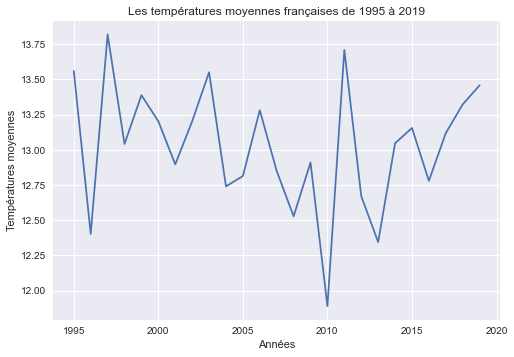

In [131]:
plt.plot(local_france['AvgTemperature'])
plt.xlabel('Années')
plt.ylabel('Températures moyennes')
plt.title('Les températures moyennes françaises de 1995 à 2019')
plt.show()

## L'évolution moyenne de la température chaque mois de l'année de chaque région du globe

In [132]:
local_globe = pd.read_csv('./data/RAW/temperatures_filtre.csv')

In [133]:
local_region_globe = local_globe.groupby('Region')

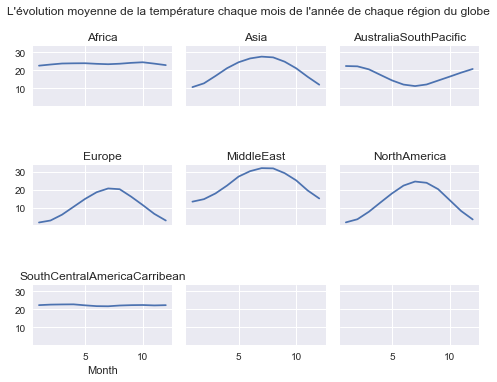

In [134]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharex='col', sharey=True, gridspec_kw={'hspace': 1, 'wspace': 0.10})
fig.suptitle("L'évolution moyenne de la température chaque mois de l'année de chaque région du globe")

axs = axs.flat

for region, ax in zip(local_region_globe, axs):
    ax.set_title(region[0])
    region[1].groupby('Month').agg({'AvgTemperature': 'mean'}).plot(ax=ax, label=False)
    ax.get_legend().remove()

plt.show()



## Le classement graphique des pays les plus chauds au monde

In [135]:
local_chaud = pd.read_csv('./data/RAW/temperatures_filtre.csv')

In [136]:
local_chaud = local_chaud.drop(columns = ['Unnamed: 0', 'Region', 'State', 'City', 'Year', 'Month', 'Day'], axis = 1)

In [137]:
local_chaud = local_chaud[['Country', 'AvgTemperature']].groupby('Country').agg({'AvgTemperature': 'mean'})

In [138]:
local_chaud = local_chaud.sort_values(by = 'AvgTemperature', ascending = False)[:5]

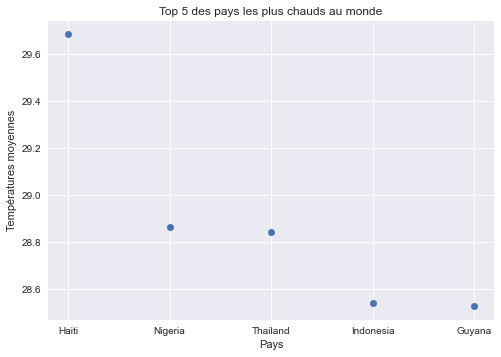

In [139]:
plt.plot(local_chaud['AvgTemperature'], linewidth=0, marker='o')
plt.xlabel('Pays')
plt.ylabel('Températures moyennes')
plt.title('Top 5 des pays les plus chauds au monde')
plt.show()

## Le classement graphique des pays les plus froids au monde

In [140]:
local_froid = pd.read_csv('./data/RAW/temperatures_filtre.csv')

In [141]:
local_froid = local_froid.drop(columns = ['Unnamed: 0', 'Region', 'State', 'City', 'Year', 'Month', 'Day'], axis = 1)

In [142]:
local_froid = local_froid[['Country', 'AvgTemperature']].groupby('Country').agg({'AvgTemperature': 'mean'})

In [143]:
local_froid = local_froid.sort_values(by = 'AvgTemperature', ascending = True)[:5]

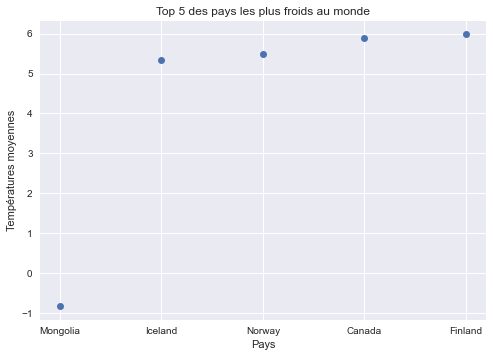

In [144]:
plt.plot(local_froid['AvgTemperature'], linewidth=0, marker='o')
plt.xlabel('Pays')
plt.ylabel('Températures moyennes')
plt.title('Top 5 des pays les plus froids au monde')
plt.show()

## L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique

In [145]:
local_haiti = pd.read_csv('./data/CURATED/Country/Haiti.csv')
local_mongolie = pd.read_csv('./data/CURATED/Country/Mongolia.csv')

In [146]:
local_haiti = local_haiti.drop(columns = ['Unnamed: 0', 'Region', 'State', 'City', 'Month', 'Day'], axis = 1)
local_mongolie = local_mongolie.drop(columns = ['Unnamed: 0', 'Region', 'State', 'City', 'Month', 'Day'], axis = 1)

In [147]:
local_haiti = local_haiti[['Country', 'Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})
local_mongolie = local_mongolie[['Country', 'Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

In [148]:
local_mongolie = local_mongolie[local_mongolie.index != 1998]

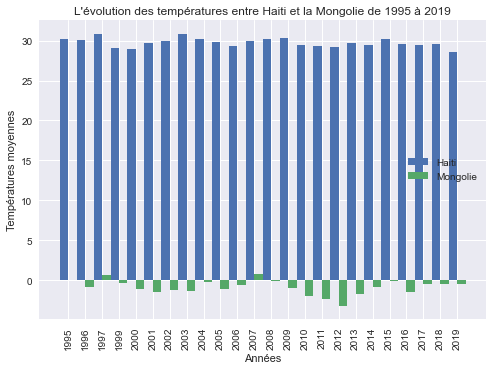

In [149]:
position = np.arange(len(local_haiti.index))

largeur = .50

fig, ax = plt.subplots()
r1 = ax.bar(position - largeur/2, local_haiti['AvgTemperature'], largeur, label = "Haiti")
r2 = ax.bar(position + largeur/2, local_mongolie['AvgTemperature'], largeur, label = "Mongolie")

ax.set_xticks(position)
ax.set_xticklabels(local_mongolie.index)

plt.title("L'évolution des températures entre Haiti et la Mongolie de 1995 à 2019")
plt.xlabel("Années")
plt.ylabel("Températures moyennes")
plt.legend(loc="center right")
plt.xticks(rotation=90)

plt.show()

## L'évolution de la température moyenne de la ville de Paris.

In [150]:
local_paris = pd.read_csv('./data/CURATED/Country/France.csv')

In [151]:
local_paris = local_paris.drop(columns = ['Unnamed: 0', 'Region', 'State', 'Country', 'Month', 'Day'], axis = 1)

In [152]:
local_paris = local_paris[local_paris['City'] == 'Paris']

In [153]:
local_paris = local_paris[['City', 'Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

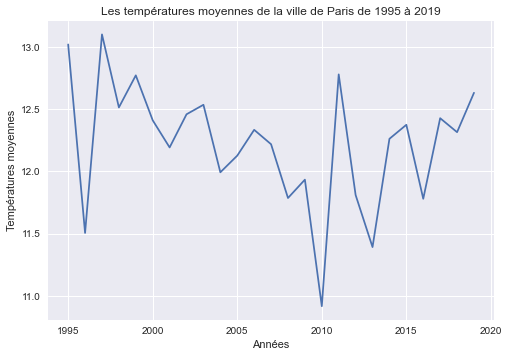

In [154]:
plt.plot(local_paris['AvgTemperature'])
plt.xlabel('Années')
plt.ylabel('Températures moyennes')
plt.title('Les températures moyennes de la ville de Paris de 1995 à 2019')
plt.show()

## La température moyenne de chaque pays sur une carte sur la période 2010-2019.

In [155]:
plt.style.use('seaborn')

In [156]:
local_carte = pd.read_csv('./data/RAW/temperatures_filtre.csv')
local_carte = local_carte[['Region', 'Country', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']][local_carte['Year'] > 2009]
local_moyenne_carte = local_carte.groupby(['Country'])['AvgTemperature'].mean()

In [157]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap = worldmap.replace(to_replace ="United States of America", value ="US")

In [158]:
worldmap.rename(columns={"name" : "Country"}, inplace=True)

In [159]:
worldmap.set_index("Country", inplace=True)

In [160]:
worldmap_with_data = worldmap.join(local_moyenne_carte).reset_index()

<AxesSubplot:>

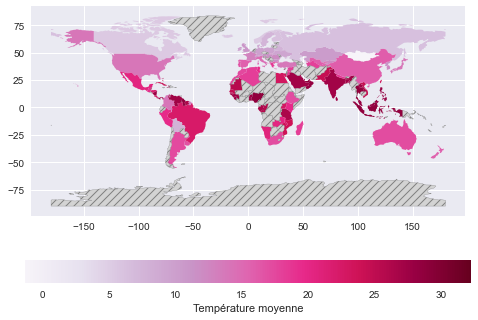

In [161]:
worldmap_with_data.plot(column="AvgTemperature", legend=True, cmap='PuRd', missing_kwds={"color": "lightgrey","edgecolor": "grey","hatch": "///","label": "Missing values"}, legend_kwds={'label': "Température moyenne", 'orientation': "horizontal"})